In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *
import csv


In [3]:
data_dir = '/nfshome/hassan/QNUM/data_color_plot/'
fname = 'each_L_each_coherence_optimal_cutoff_and_skr.csv'
with open(data_dir+ fname, mode ='r')as file:
  csvFile = csv.reader(file)
  i = 0
  for lines in csvFile:
        if i< 10:
            print(lines)
            i += 1
        else:
            break

['50.0', '5.0118723362727245e-05', '0.00015102906995536724', '1.2001992839572039e-08']
['50.0', '6.016034869850822e-05', '0.00015102906995536724', '6.26821935219013e-07']
['50.0', '7.221388161330746e-05', '0.00015102906995536724', '1.6871803453373245e-05']
['50.0', '8.668242140342028e-05', '0.00015102906995536724', '0.0002602486330960163']
['50.0', '0.00010404983103657863', '0.0002768333720031507', '0.0025827642588983134']
['50.0', '0.00012489691869998188', '0.0002768333720031507', '0.019992588294908027']
['50.0', '0.0001499208614309617', '0.0002768333720031507', '0.11066850974656837']
['50.0', '0.00017995852040347335', '0.0002768333720031507', '0.4711970614391815']
['50.0', '0.00021601442758998932', '0.0002768333720031507', '1.5822682943751316']
['67.94871794871796', '5.0118723362727245e-05', '0.00020524463352908885', '3.168576512280197e-12']


In [5]:

data_dir = '/nfshome/hassan/QNUM/data_color_plot/'
fname = 'equal_distance_repeater_placement_coherence_distance_opt_cutoff_skr.csv'

τ_coh_list = np.logspace(-4.3,-2,30) # coherence time [sec]
τ_coh =  τ_coh_list[4]
Le2e_list = np.linspace(50,400,40)
L0 = Le2e_list[1]

cut_off = []
e2e_rate = []
skr = []
τ_coh_list = []
L_list = []
with open(data_dir+ fname, mode ='r') as file:
    csvFile = csv.reader(file)
    for line in csvFile:
        L_list.append(float(line[14]))
L0 = sorted(list(set(L_list)))[0]

with open(data_dir+ fname, mode ='r') as file:
    csvFile = csv.reader(file)
    for line in csvFile:
        # print(line)
        # if i< 2:
            # print(lines)
        L = (float(line[14]))
        # L_list.append(float(line[14]))
        coherence_time = float(line[27])/1000# in seconds
        if np.abs(L - L0)<1e-4 and np.abs(coherence_time-τ_coh)< 1e-7:
            cut_off.append(float(line[4])/1000000)# gives cutoff in seconds
            e2e_rate.append(float(line[7]))
            skr.append(float(line[11]))
            # print(coherence_time)
            # τ_coh_list.append(float(line[27])/1000)# in seconds
            # print(L)
            # print(cut_off)
            # print(e2e_rate)
            # i += 1
        # else:
        #     break


Text(0.5, 0, 'cutoff time')

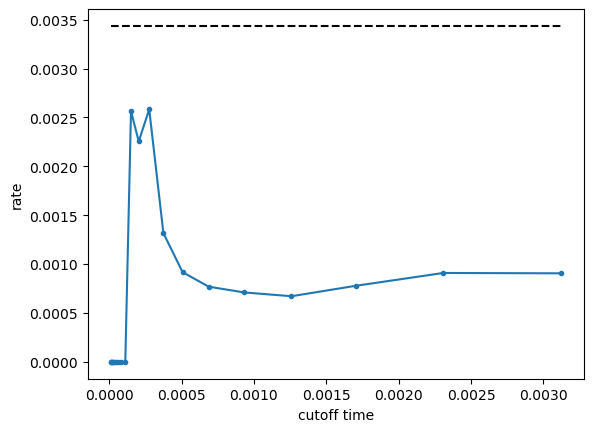

In [6]:
from util import T_parallel_no_cutoff
F_link = 1 # fidelity of local BP
mu_link = 1 # depolarizing noise channel parameter (1: no noise, 0: fully depolarized)
n = 4
Le2e = L0
Ls = [Le2e/n]*n
raw_rate_par_no_cut, skr_par_no_cut, Fe2e_par_no_cut = T_parallel_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= True, Nmax=1e6)

# raw_rate_par_no_cut

cut_off = np.array(cut_off)
idx = np.argsort(cut_off)
cut_off = cut_off[idx]
skr = np.array(skr)
skr = skr[idx]
plt.plot(cut_off,skr,".-")
plt.plot(cut_off, cut_off*0 + skr_par_no_cut, "k--",label='no cutoff')
plt.ylabel('rate')
plt.xlabel('cutoff time')

In [67]:
print(τ_coh)

0.00021601442758998932


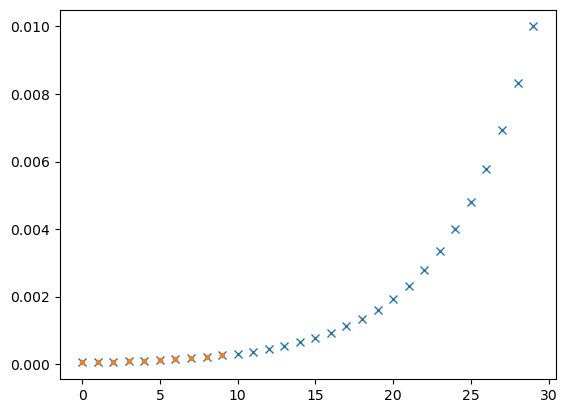

In [10]:
τ_coh_0 = np.logspace(-4.3,-2,30) # coherence time [sec]
plt.plot(τ_coh_0,"x")
plt.plot(sorted(list(set(τ_coh_list))),".")
# plt.plot(sorted(τ_coh_list),".")

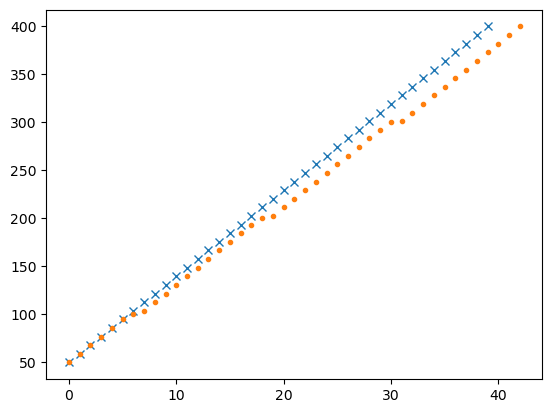

In [17]:
plt.plot(Le2e_list,"x")
plt.plot(sorted(list(set(L_list))),".")
# plt.plot(sorted(τ_coh_list),".")